In [5]:
import numpy as np
import pandas as pd 
%matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.linear_model import LinearRegression
%matplotlib inline
from datetime import datetime,timedelta



UsageError: Line magic function `%matplotlib.pyplot` not found.


In [6]:
data=pd.read_csv("SBINDATA.csv")

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-29,133.600006,140.979996,133.600006,140.384995,48.670589,26616360.0
1,2008-09-01,139.000000,143.470001,136.100006,141.559998,49.077950,16822410.0
2,2008-09-02,142.000000,154.800003,142.000000,152.300003,52.801445,32085130.0
3,2008-09-04,150.009995,154.669998,146.145004,153.470001,53.207069,25526720.0
4,2008-09-05,151.149994,153.720001,147.000000,151.985001,52.692234,27862810.0


In [8]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [9]:
p=data.dropna()

In [10]:
p.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-29,133.600006,140.979996,133.600006,140.384995,48.670589,26616360.0
1,2008-09-01,139.000000,143.470001,136.100006,141.559998,49.077950,16822410.0
2,2008-09-02,142.000000,154.800003,142.000000,152.300003,52.801445,32085130.0
3,2008-09-04,150.009995,154.669998,146.145004,153.470001,53.207069,25526720.0
4,2008-09-05,151.149994,153.720001,147.000000,151.985001,52.692234,27862810.0


In [11]:
data.shape

(2468, 7)

In [12]:
p.shape

(2460, 7)

In [13]:
p.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-29,133.600006,140.979996,133.600006,140.384995,48.670589,26616360.0
1,2008-09-01,139.000000,143.470001,136.100006,141.559998,49.077950,16822410.0
2,2008-09-02,142.000000,154.800003,142.000000,152.300003,52.801445,32085130.0
3,2008-09-04,150.009995,154.669998,146.145004,153.470001,53.207069,25526720.0
4,2008-09-05,151.149994,153.720001,147.000000,151.985001,52.692234,27862810.0


In [14]:
p.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2463,2018-08-21,308.299988,308.850006,303.350006,307.000000,307.000000,14139592.0
2464,2018-08-23,306.950012,306.950012,298.299988,302.450012,302.450012,22721004.0
2465,2018-08-24,300.600006,305.700012,299.000000,300.450012,300.450012,18869585.0
2466,2018-08-27,304.000000,310.350006,303.299988,308.000000,308.000000,28111768.0
2467,2018-08-28,308.049988,310.250000,303.399994,305.350006,305.350006,16889867.0


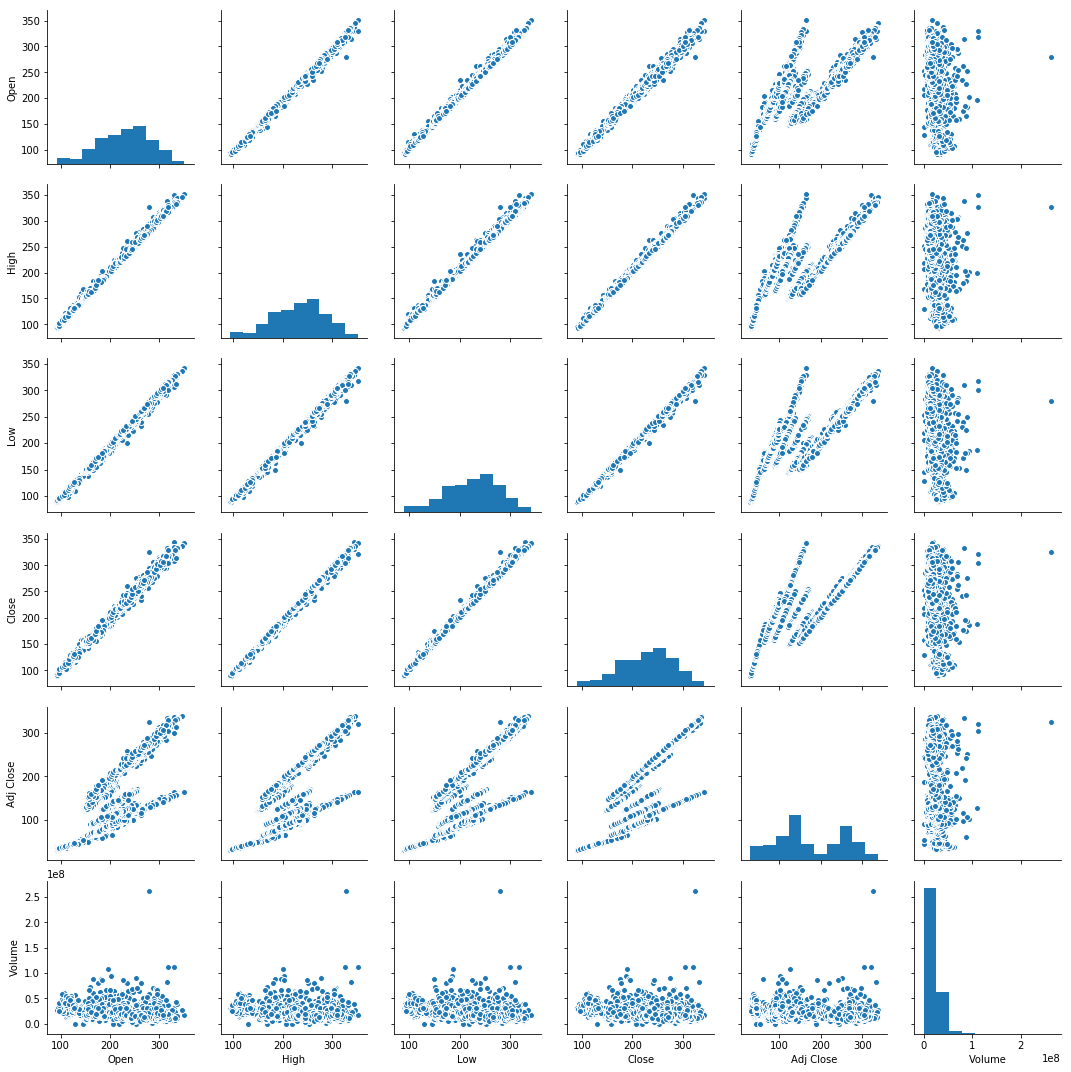

In [15]:
sns.pairplot(p)

In [17]:
dt=p['Date'].values

In [18]:
dt

array(['2008-08-29', '2008-09-01', '2008-09-02', ..., '2018-08-24',
       '2018-08-27', '2018-08-28'], dtype=object)

In [20]:
dt.astype('datetime64[D]').dtype

dtype('<M8[D]')

In [22]:
p['Date']=dt.astype('datetime64[D]').astype(int)

S:\Anaconda1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
p.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,14120,133.600006,140.979996,133.600006,140.384995,48.670589,26616360.0
1,14123,139.000000,143.470001,136.100006,141.559998,49.077950,16822410.0
2,14124,142.000000,154.800003,142.000000,152.300003,52.801445,32085130.0
3,14126,150.009995,154.669998,146.145004,153.470001,53.207069,25526720.0
4,14127,151.149994,153.720001,147.000000,151.985001,52.692234,27862810.0


In [24]:
p['Date'].values

array([14120, 14123, 14124, ..., 17767, 17770, 17771])

In [25]:
p.dtypes

Date           int32
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

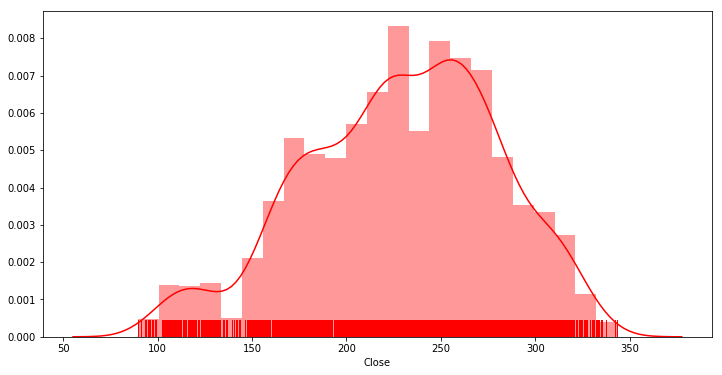

In [31]:
plt.figure(figsize=(12,6))

sns.distplot(p['Close'],color='red',hist=True,rug=True)

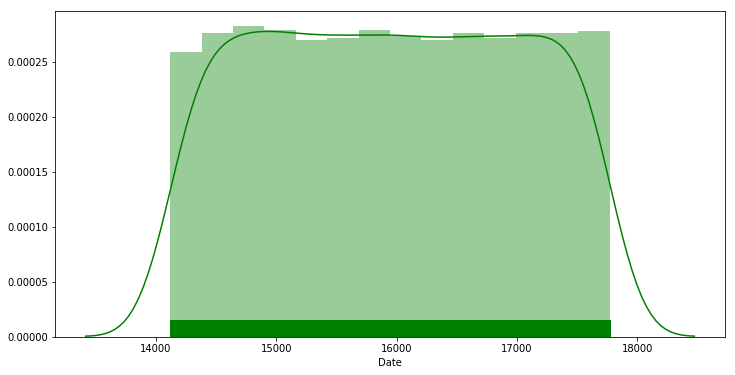

In [33]:
plt.figure(figsize=(12,6))
sns.distplot(p['Date'],color='green',hist=True,rug=True)

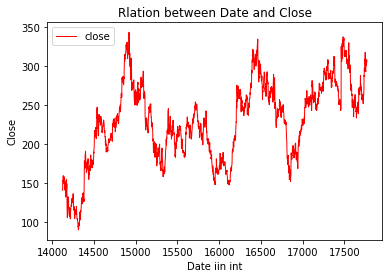

In [40]:
plt.plot(p['Date'],p['Close'],color='red',lw=1,label='close')
plt.xlabel('Date iin int')
plt.ylabel('Close')
plt.title('Rlation between Date and Close')
plt.legend()
plt.show()

In [41]:
#predicting Closerate With help of dates

In [43]:
date=np.array(p.Date)

In [44]:
close=np.array(p.Close)

In [45]:
p.shape

(2460, 7)

In [48]:
x=date.reshape(date.shape[0],1).astype(int)

In [50]:
x

array([[14120],
       [14123],
       [14124],
       ...,
       [17767],
       [17770],
       [17771]])

In [52]:
y=close.reshape(close.shape[0],1)

In [53]:
y

array([[140.384995],
       [141.559998],
       [152.300003],
       ...,
       [300.450012],
       [308.      ],
       [305.350006]])

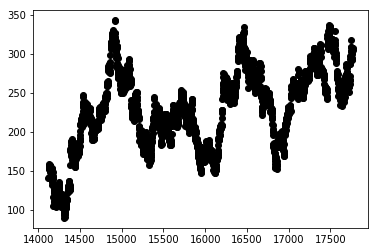

In [55]:
plt.scatter(x,y,color='black')

In [56]:
from sklearn.cross_validation import train_test_split

S:\Anaconda1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

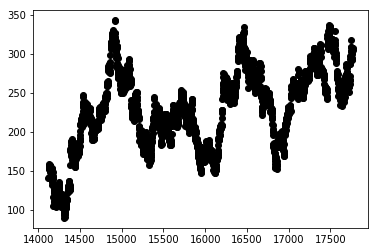

In [59]:
plt.scatter(x,y,color='black')

In [60]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [61]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
print("R squared score(training data):{}".format(reg.score(x_train,y_train)))
print(" R Sqaurew score (testing data):{}".format(reg.score(x_test,y_test)))

R squared score(training data):0.28126735065906117
 R Sqaurew score (testing data):0.2694574927502411


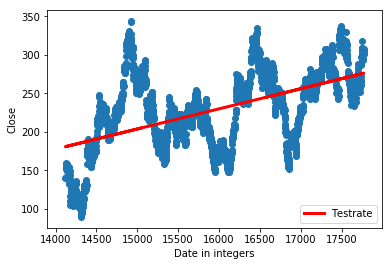

In [66]:
plt.plot(x_train,reg.predict(x_train),color='red',lw=3,label='Testrate')
plt.scatter(x,y)
plt.xlabel("Date in integers")
plt.ylabel("Close")
plt.legend()
plt.show()